In [148]:
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv("/home/rex/Desktop/Projects/study/fpl/FPL/Fantasy-Premier-League/data/2022-23/cleaned_players.csv", index_col=None)
data.head(2)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Cédric,Alves Soares,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.2,42,DEF
1,Granit,Xhaka,1,2,26,537,7,139.4,133.2,102.0,2,113,37.5,2,0,1,3.0,50,MID


In [150]:
data.shape

(624, 19)

In [151]:
data.columns.values

array(['first_name', 'second_name', 'goals_scored', 'assists',
       'total_points', 'minutes', 'goals_conceded', 'creativity',
       'influence', 'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets',
       'red_cards', 'yellow_cards', 'selected_by_percent', 'now_cost',
       'element_type'], dtype=object)

In [181]:
X = data[["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']]
Y = data[["goals_scored", "assists", "total_points", 'minutes', 'goals_conceded', 'bonus', 'clean_sheets', 'red_cards', 'yellow_cards', 'selected_by_percent', 'now_cost']]

In [182]:
X.head()

,creativity,influence,threat,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
0,0.0,0.0,0.0,0.0,0,0.2,42,DEF
1,139.4,133.2,102.0,37.5,2,3.0,50,MID
2,3.8,4.2,0.0,0.8,0,0.9,43,MID
3,0.0,2.2,0.0,0.2,0,0.1,43,DEF
4,21.5,41.2,49.0,11.2,2,0.3,48,MID


In [183]:
Y.head()

,goals_scored,assists,total_points,minutes,goals_conceded,bonus,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,0,0,0,0,0,0,0,0,0,0.2,42
1,1,2,26,537,7,2,2,0,1,3.0,50
2,0,0,2,90,1,0,0,0,0,0.9,43
3,0,0,2,3,0,0,0,0,0,0.1,43
4,0,0,8,270,2,0,2,0,0,0.3,48


In [184]:
X[['element_type']].value_counts()

element_type
MID             270
DEF             223
FWD              69
GK               62
dtype: int64

In [185]:
def post_to_int(pos: str) -> int:
    assert pos in ['GK', 'DEF', 'MID', 'FWD'], f'{pos} not an element type'
    if pos == 'GK':
        return 1
    elif pos == 'DEF':
        return 2
    elif pos == 'MID':
        return 3
    elif pos == 'FWD':
        return 4

In [186]:
X.loc[X['element_type'] == 'DEF', 'element_type'] = 2
X.loc[X['element_type'] == 'GK', 'element_type'] = 1
X.loc[X['element_type'] == 'MID', 'element_type'] = 3
X.loc[X['element_type'] == 'FWD', 'element_type'] = 4

In [187]:
X.head()

,creativity,influence,threat,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
0,0.0,0.0,0.0,0.0,0,0.2,42,2
1,139.4,133.2,102.0,37.5,2,3.0,50,3
2,3.8,4.2,0.0,0.8,0,0.9,43,3
3,0.0,2.2,0.0,0.2,0,0.1,43,2
4,21.5,41.2,49.0,11.2,2,0.3,48,3


In [188]:
Y.columns

Index(['goals_scored', 'assists', 'total_points', 'minutes', 'goals_conceded',
       'bonus', 'clean_sheets', 'red_cards', 'yellow_cards',
       'selected_by_percent', 'now_cost'],
      dtype='object')

In [189]:
# fit a model to predict points
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values,
    Y['total_points'].values,
    test_size=.33,
    shuffle=True,
    random_state=42
)

In [237]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, verbose=0, criterion='mse')
reg.fit(X_train, y_train)

/home/rex/Desktop/Projects/study/fpl/FPL/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [191]:
reg.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9046717355207452

In [193]:
pred = reg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


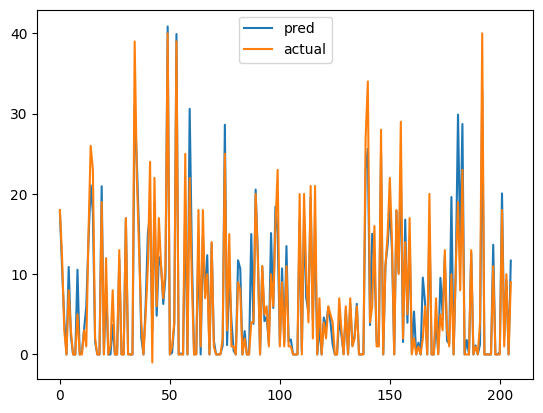

In [194]:
plt.plot(pred, label='pred')
plt.plot(y_test, label='actual')
plt.legend()
plt.show()

In [ ]:
elements = ["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']

In [240]:
def make_player_pred(fst_nm, lst_nm):
    player = data[
        (data['first_name'] == fst_nm) & (data['second_name'] == lst_nm)
    ][["creativity", "influence", "threat", 'ict_index', 'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type']]

    player.loc[player['element_type'] == 'DEF', 'element_type'] = 2
    player.loc[player['element_type'] == 'GK', 'element_type'] = 1
    player.loc[player['element_type'] == 'MID', 'element_type'] = 3
    player.loc[player['element_type'] == 'FWD', 'element_type'] = 4

    print(f"{fst_nm} {lst_nm}:")
    return reg.predict(player.values)

In [241]:
print(make_player_pred('Gabriel', 'Fernando de Jesus'))
print(make_player_pred('Kevin', 'De Bruyne'))
print(make_player_pred('Harry', 'Kane'))
print(make_player_pred('Raheem', 'Sterling'))
print(make_player_pred('Pascal', 'Groß'))
print(make_player_pred('Luis', 'Díaz'))

Gabriel Fernando de Jesus:
[36.27]
Kevin De Bruyne:
[36.38]
Harry Kane:
[41.58]
Raheem Sterling:
[26.03]
Pascal Groß:
[41.45]
Luis Díaz:
[30.66]


In [245]:
print(make_player_pred('Marc', 'Cucurella Saseta'))
print(make_player_pred('William', 'Saliba'))
print(make_player_pred('Trent', 'Alexander-Arnold'))

Marc Cucurella Saseta:
[14.37]
William Saliba:
[23.65]
Trent Alexander-Arnold:
[24.01]
